In [1]:
%matplotlib inline
import bluepyopt as bpop
import epileptor_evaluator
import epileptor_util
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
import pickle
import ukf


def save_obj(obj, name):
    with open('obj/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):
    with open('obj8143734_success/' + name + '.pkl', 'rb') as f: # 8134961
        return pickle.load(f)
    

def plot_sim_trace(sim, x=None, *argv):
    fig = plt.figure(figsize=(10,2))
    if x is None:
        plt.plot(sim.noisy_data[0], *argv)
    else:
        plt.plot(x, sim.noisy_data[0], *argv)
    return fig

/Users/emilyschlafly/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def reload_packages():
    global epileptor_util, epileptor_evaluator, ukf
    epileptor_util = reload(epileptor_util)
    epileptor_evaluator = reload(epileptor_evaluator)
    ukf = reload(ukf)

In [6]:
hof = []
for i in range(2):
    hof.append(load_obj('params' + str(i+1)))

In [12]:
for key, value in sorted(epileptor_util.param_epileptor.iteritems()):
    if value is None:
        continue
    val1 = hof[0][key]
    val2 = hof[1][key]
    print('{} & {:6.2f} & {:6.2f} & {:6.2f} \\\\'.format(key, value, val1, val2))

Irest1 &   3.10 &   3.50 &   4.00 \\
Irest2 &   0.45 &   0.21 &   0.39 \\
a &   5.00 &   5.09 &   4.99 \\
b &   4.00 &   6.38 &   5.12 \\
c &   0.30 &   0.45 &   0.11 \\
d &   3.50 &   3.14 &   3.38 \\
g_init &   0.00 &   0.00 &   0.00 \\
gamma &   0.01 &   0.01 &   0.01 \\
noise_ensemble1 &   0.03 &   0.00 &   0.00 \\
noise_ensemble2 &   0.25 &   0.00 &   0.00 \\
tau0 & 2857.00 & 3614.83 & 3788.35 \\
tau1 &   1.00 &   1.00 &   1.00 \\
tau2 &  10.00 &  10.00 &  10.00 \\
x0 &  -1.60 &  -1.60 &  -1.60 \\
x1_init &   0.00 &   0.00 &   0.00 \\
x2_init &   0.00 &   0.00 &   0.00 \\
y0 &   1.00 &   1.00 &   1.00 \\
y1_init &  -5.00 & -12.06 &  -8.36 \\
y2_init &   0.00 &   0.00 &   0.00 \\
z_init &   3.00 &   2.59 &   3.73 \\


('colors: ', (1.0, 0.48971193415637881, 0.0, 1.0))


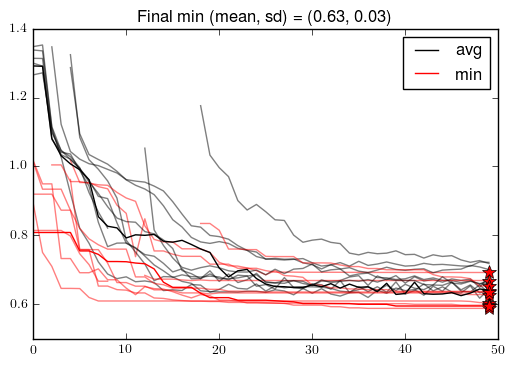

In [558]:
avg = []
gmin = []
final = []
colors = plt.get_cmap('jet', 10)
print('colors: ', colors(7))
for i in range(1,11):
    log = load_obj('log' + str(i))
    avg.append([])
    gmin.append([])
    for g in log:
        avg[i-1].append(g['avg'])
        gmin[i-1].append(g['min'])
    if i < 10:
        plt.plot(avg[i-1], 'k', alpha=.5)  # '--', color=colors(i))
        plt.plot(gmin[i-1], 'r', alpha=.5)  # '-', color=colors(i))
        plt.plot(len(avg[0])-1, gmin[i-1][-1], 'r*', markersize=10)
    final.append(g['min'])
# plt.plot(avg[i-1], '--', color=colors(i), label='avg')
# plt.plot(gmin[i-1], '-', color=colors(i), label='min')
plt.plot(avg[i-1], 'k', label='avg')
plt.plot(gmin[i-1], 'r', label='min')
plt.plot(len(avg[0])-1, gmin[i-1][-1], 'r*', markersize=10)
plt.legend()
plt.title('Final min (mean, sd) = ({:4.2f}, {:4.2f})'.format(np.mean(final), np.std(final)))
plt.show()

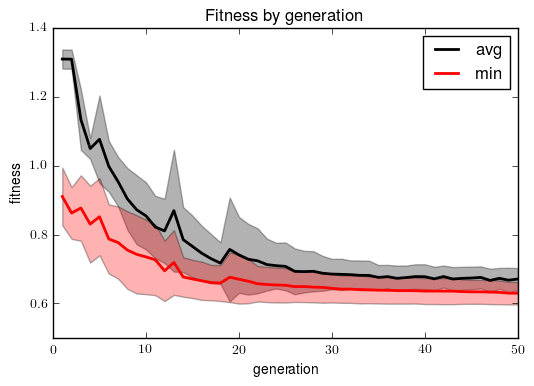

In [580]:
avg_color = 'k'
min_color = 'r'

alpha0 = .3
alpha1 = 1.

x = np.array(range(50)) + 1
avg_array = np.array(avg)
min_array = np.array(gmin)
mu_avg = np.nanmean(avg_array, axis=0)
mu_min = np.nanmean(min_array, axis=0)
sigma_avg = np.nanstd(avg_array, axis=0)
sigma_min = np.nanstd(min_array, axis=0)

# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig, ax2 = plt.subplots()
# fig.set_figwidth(10)
ax2.fill_between(x, mu_avg - sigma_avg, mu_avg + sigma_avg, 
                facecolor=avg_color, alpha=alpha0)
ax2.fill_between(x, mu_min - sigma_min, mu_min + sigma_min, 
                facecolor=min_color, alpha=alpha0)
# ax1.plot(x, avg_array.T, avg_color, alpha=alpha1)
# ax1.plot(x, min_array.T, min_color, alpha=alpha1)
ax2.plot(x, mu_avg, avg_color, lw=2, label='avg')
ax2.plot(x, mu_min, min_color, lw=2, label='min')
ax2.legend()
ax2.set_title('Fitness by generation')
ax2.set_xlabel('generation')
ax2.set_ylabel('fitness')
fig.show()

In [607]:
hof = []
for i in range(1, 11):
    hof.append(load_obj('hall_of_fame' + str(i))[0])
hof = np.array(hof)


In [ ]:
'y1_init', 'z_init', 'tau0', 'a', 'b', 'c', 'd', 'Irest1', 'Irest2'

In [506]:
load_obj('params10')

{'Irest1': 3.7123023189446145,
 'Irest2': 0.2995994150907484,
 'a': 5.171048934611355,
 'b': 5.122112650821288,
 'c': 0.08320219382639862,
 'd': 3.454440911701242,
 'g_init': 0.0,
 'gamma': 0.01,
 'noise_ensemble1': 0.0,
 'noise_ensemble2': 0.0,
 'observation_sigmas': 0.0,
 'tau0': 2900.1530561948775,
 'tau1': 1.0,
 'tau2': 10.0,
 'x0': -1.6,
 'x1_init': 0.0,
 'x2_init': 0.0,
 'y0': 1.0,
 'y1_init': -11.27214286292936,
 'y2_init': 0.0,
 'z_init': 3.004450922013524}

In [653]:
hof_n_mean = np.zeros_like(hof)
for i in range(9):
    hof_n_mean[:, i] = hof[:, i] / np.mean(hof[:, i])
np.mean(hof_n_mean, 0)

hof_n_range = np.zeros_like(hof)
for i in range(9):
    hof_n_range[:, i] = hof[:, i] / (ep_params[i][2] - ep_params[i][1])
    

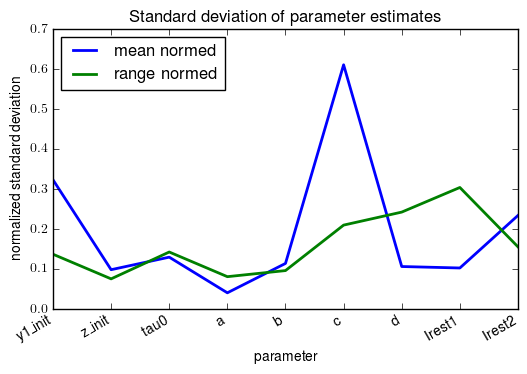

In [654]:
lw = 2

fig, ax = plt.subplots()
ax.plot(np.std(hof_n_mean, 0), lw=lw, label='mean normed')
ax.plot(np.std(hof_n_range, 0), lw=lw, label='range normed')
ax.set_xticklabels(labels)
ax.legend(loc='upper left')
ax.set_title('Standard deviation of parameter estimates')
ax.set_xlabel('parameter')
ax.set_ylabel('normalized standard deviation')
fig.autofmt_xdate()

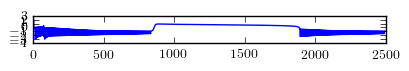

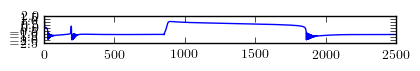

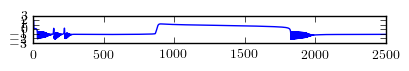

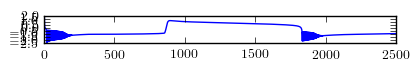

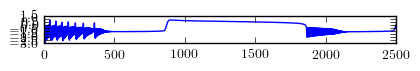

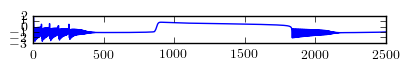

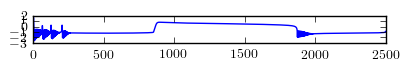

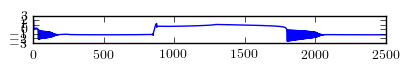

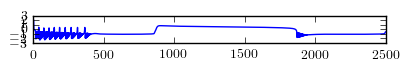

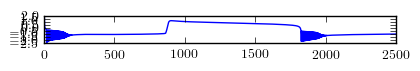

In [30]:
fig = plt.figure()
ax = []
em = []

for i in range(10):
    params = load_obj('params' + str(i + 1))
    em.append(epileptor_util.epileptor_model(params=params))
    em[i].generate_simulation(plot=True)
    ax.append(fig.add_subplot(5, 2, i+1))
    ax[i].plot(em[i].time, em[i].noisy_data[0])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()


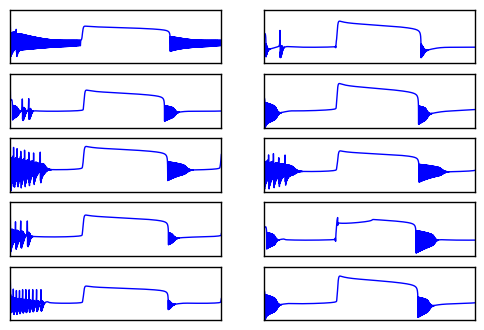

In [43]:
fig = plt.figure()
ax = []
for i in range(10):
    ax.append(fig.add_subplot(5, 2, i+1))
    ax[i].plot(em[i].time, em[i].noisy_data[0])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

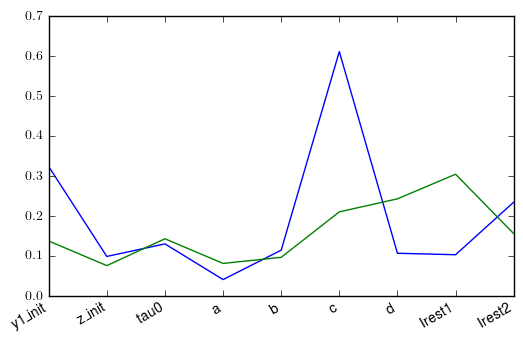

In [606]:
P = []
for i in range(9):
    P.append([])
cmap = plt.get_cmap('hsv', 10)
for i in range(1,11):
    hof = load_obj('hall_of_fame' + str(i))
    for j in range(len(hof[0])):
        P[j].append(hof[0][j])
avg = []
std = []
for i in range(9):
    avg.append(np.mean(P[i]))
    std.append(np.std(P[i]))
fig, ax = plt.subplots()
diff = [hi - lo for name, lo, hi in ep_params]
ax.plot([s / abs(a) for s, a in zip(std, avg)])
ax.plot([s / d for s, d in zip(std, diff)])

labels = ['y1\_init', 'z\_init', 'tau0', 'a', 'b', 'c', 'd', 'Irest1', 'Irest2']


ax.set_xticklabels(labels)
fig.autofmt_xdate()
ax.set_title('Normalized standard deviation\in estimated parameters')
ax.set_xlabel('parameter')
ax.set_ylabel('relative standard deviation')
# plt.xticks(rotation='vertical')
fig.show()

In [520]:
ep_params = [('y1_init', -20., 0.),
      ('z_init', 2., 6.),
      ('tau0', 1000., 4000.),
      ('a', 3., 5.5),
      ('b', 2., 8.),
      ('c', 0., 0.6),
      ('d', 3., 4.5),
      ('Irest1', 2.8, 4.),
      ('Irest2', 0.2, 0.7)]

## Load the parameters from the BluePy optimization

In [44]:
params = {}
hall_of_fame = {}
for i in range(10):
    params[i] = load_obj('params' + str(i+1))
    hall_of_fame[i] = load_obj('hall_of_fame' + str(i+1))

## Get target
If the target is not saved (i.e. not from data or simulation was not explicitly saved), generate a new one using default parameters. Two files have been saved to be used as targets. One is an EDF file downloaded from ieeg.org; the other is a PKL file containing a simulation using the default parameters from Jirsa.

In [151]:
# filename = '/Users/emilyschlafly/BU/Kramer_rotation/' + \
#     'ieeg_data/I002_A0003_D010/outputEdf_EDF/outputEdf_0.edf'
filename = '/Users/emilyschlafly/BU/Kramer_rotation/ieeg_data/target.pkl'

To make a plot that resembles that in the Jirsa paper, use the following:

    jirsa = epileptor_util.epileptor_model(observation_sigmas=25e-4, 
                                        z_init=3.8, noise_ensemble2=15e-2, 
                                        x1_init=0.07, y1_init=0.69, x2_init=-0.7,
                                        g_init=25e-3, dt_sample=0.1)
    jirsa.generate_simulation(plot=False)
    plt.figure(figsize=(10,2))
    time = np.arange(0, jirsa.total_time, jirsa.dt_sample)
    plt.plot(time, jirsa.noisy_data[0], label='-x1+x2')
    plt.plot(time, jirsa.augmented_state[5,:], label='z')
    plt.legend()
    plt.show()
    
Otherwise, we can run a simulation using the default parameters described in the paper.

In [127]:
kf_em = ukf.unscented_kalman_filter(em, state_sigma=1., parameter_sigma=[25e-2, 25e-3, 0])
kf_em.unscented_kalman()


1.0

In [139]:
kf_em.observation_sigma * .04

0.041491466021140275

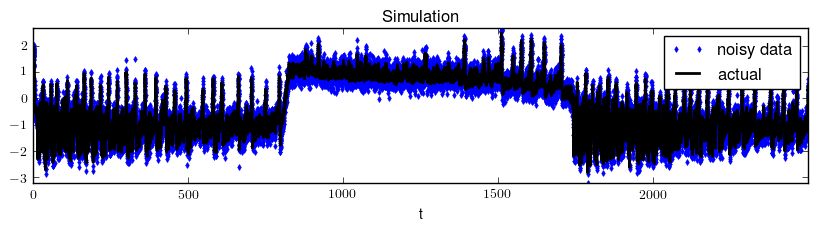

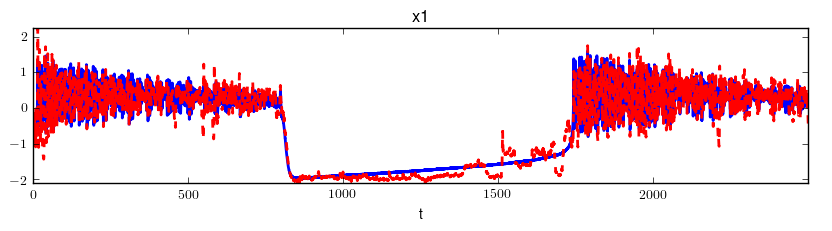

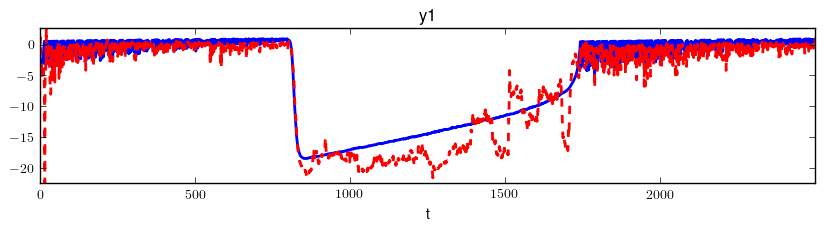

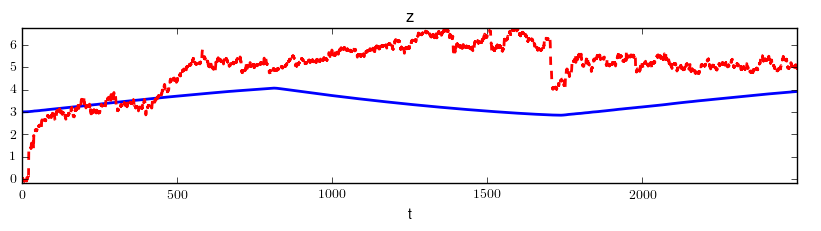

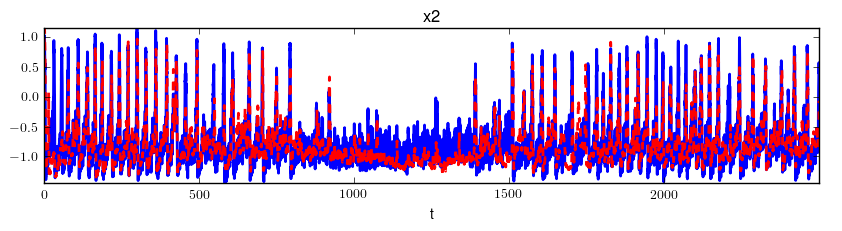

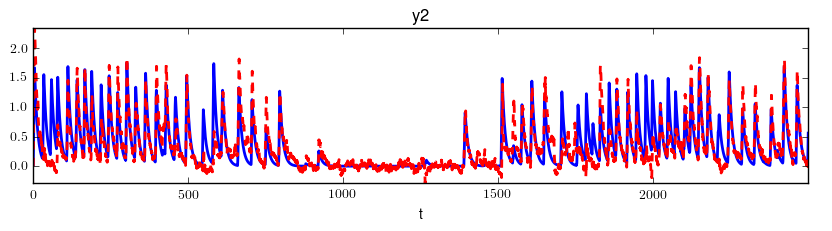

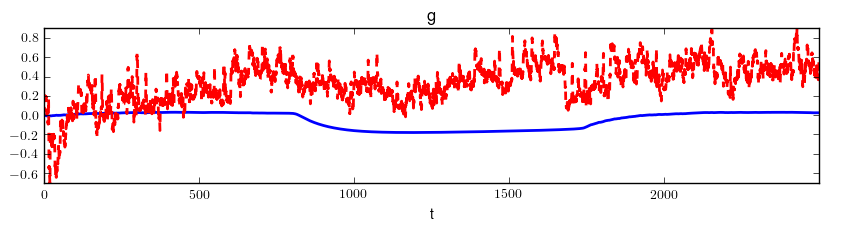

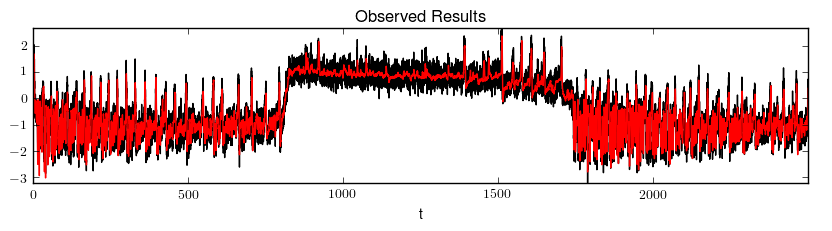

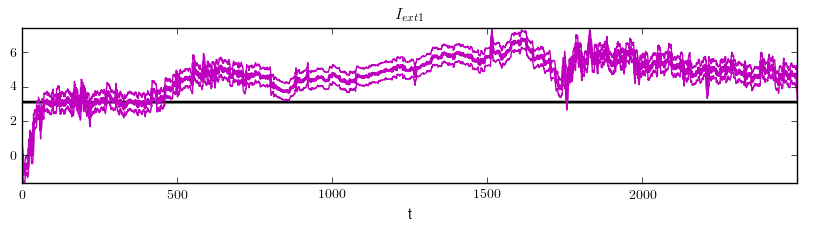

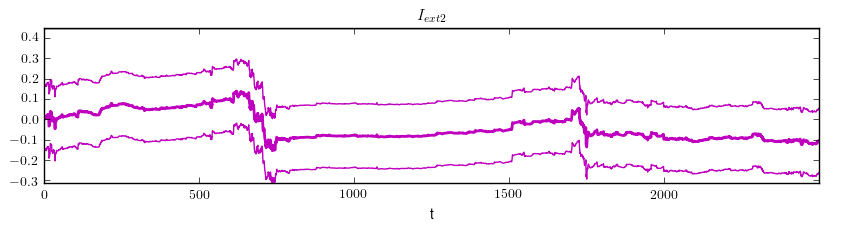

In [140]:
# reload_packages()
em = epileptor_util.epileptor_model()
em.generate_simulation()
kf_em = ukf.unscented_kalman_filter(em, state_sigma=.042, parameter_sigma=[25e-2, 25e-3, 0])
kf_em.unscented_kalman()
kf_em.plot_filter_results(separated=True)


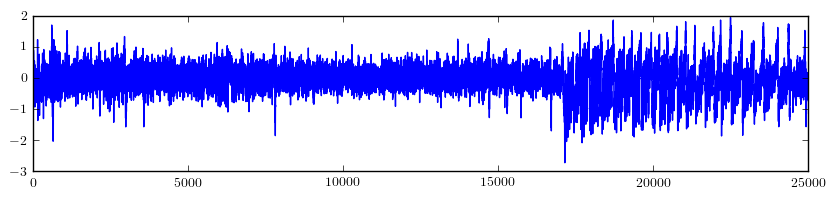

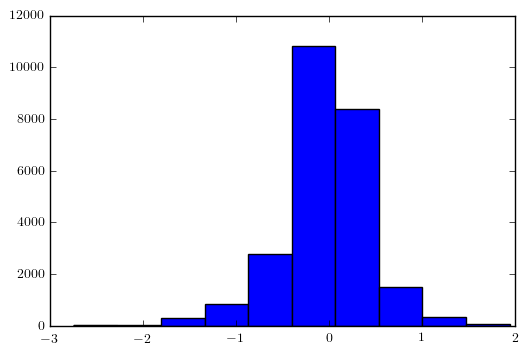

In [135]:
plt.figure(figsize=(10,2))
plt.plot(kf_em.innovation[0])
plt.show()

plt.figure()
plt.hist(kf_em.innovation[0])
plt.show()

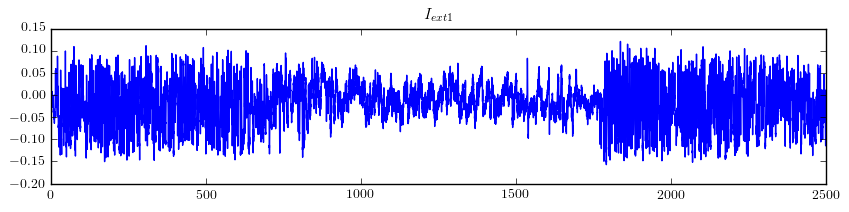

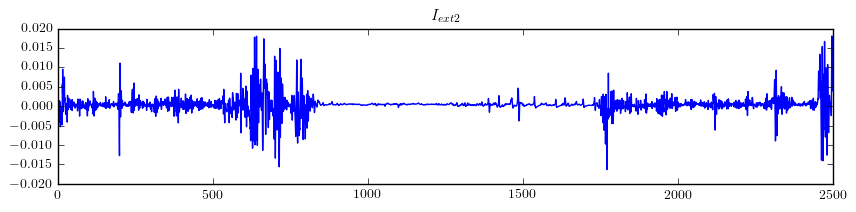

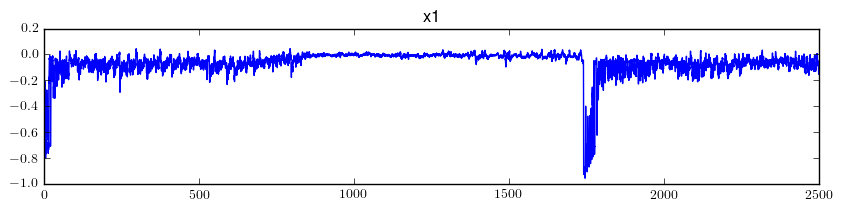

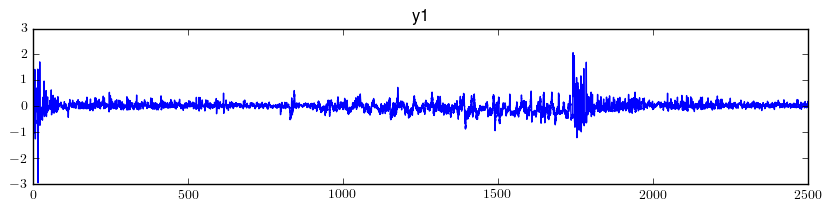

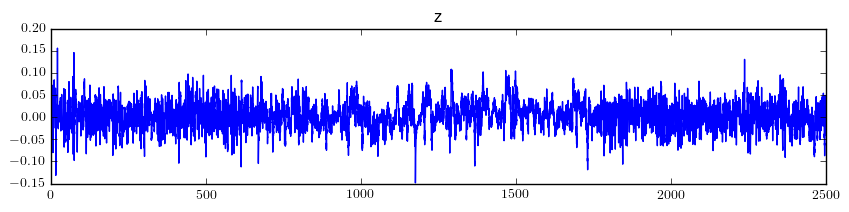

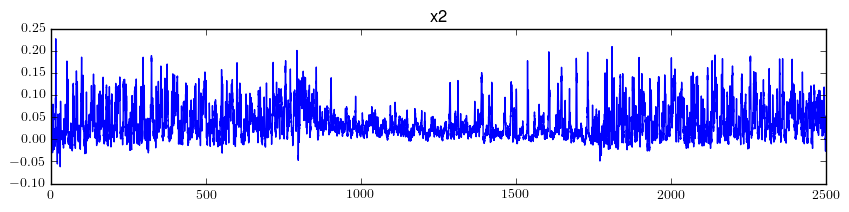

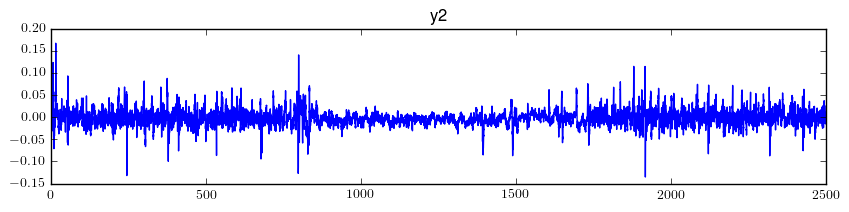

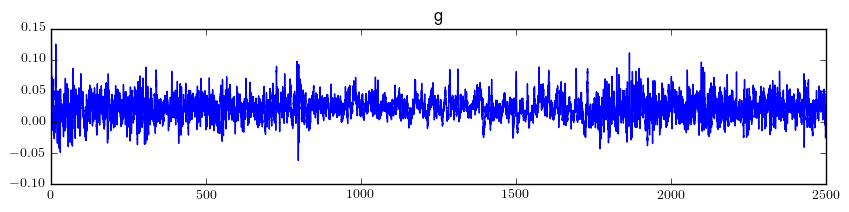

In [121]:
title_strings = np.hstack((em.parameter_names, em.var_names))
for i in range(9):
    if i == 2: 
        continue
    plt.figure(figsize=(10,2))
    plt.plot(em.time, kf_em.Ks.reshape(9, 25000)[i, :])
    plt.title(title_strings[i])
    plt.show()


In [118]:
np.std(em.noisy_data)

1.0315105948175756

## Kalman filtering using Fitzhugh-Nagumo 

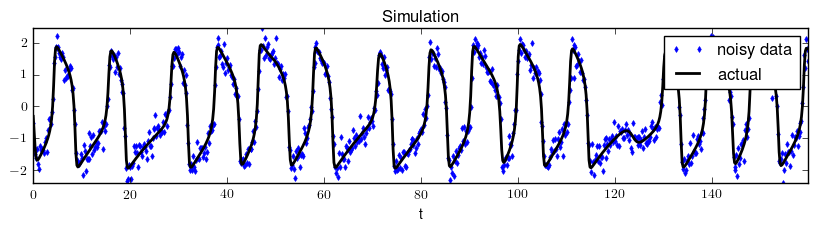

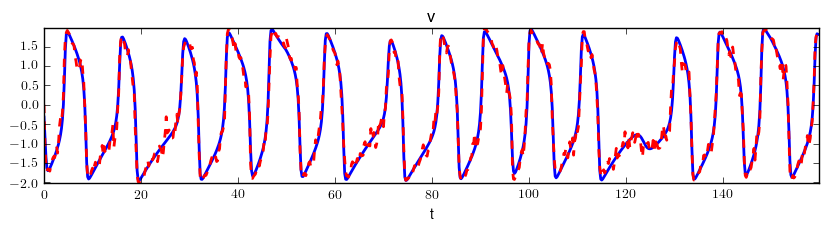

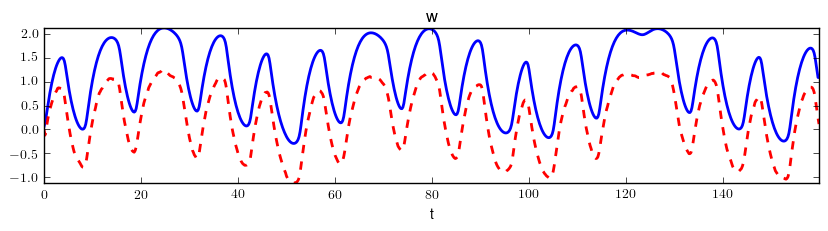

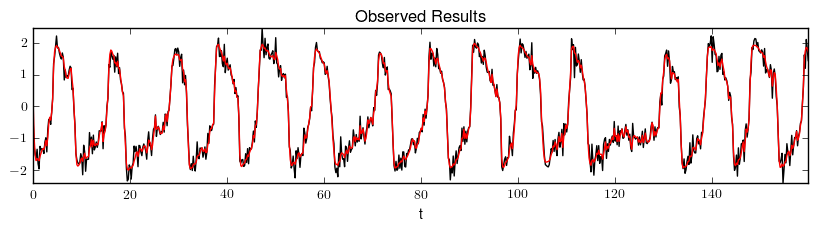

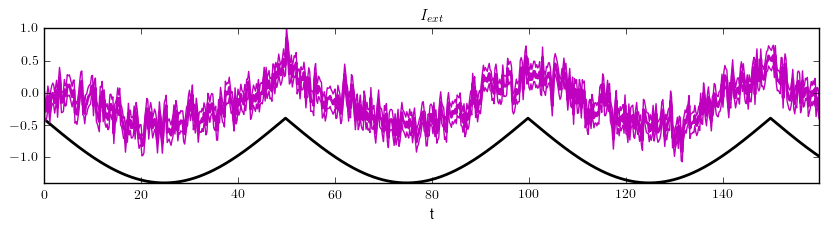

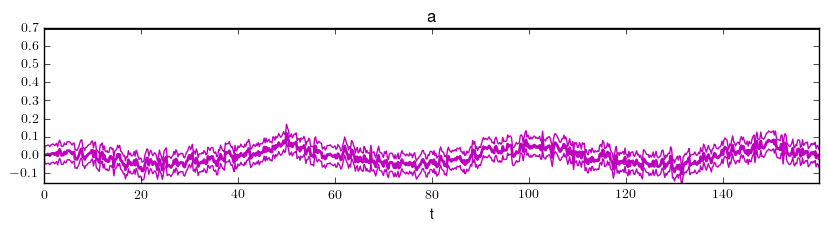

In [95]:
reload_packages()
fn = epileptor_util.FN_model()
fn.generate_simulation()
kf_fn = ukf.unscented_kalman_filter(fn, parameter_sigma=[25e-3, 25e-4])
kf_fn.unscented_kalman()
kf_fn.plot_filter_results(separated=True)


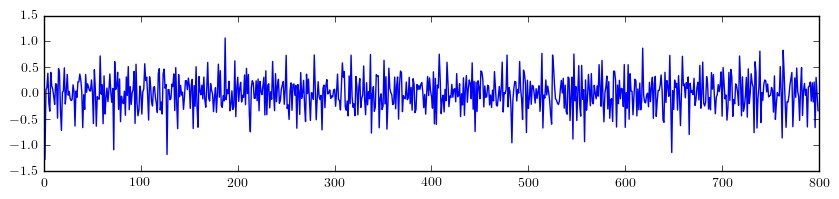

In [97]:
plt.figure(figsize=(10,2))
# for i in range(2):
#     plt.hist(np.squeeze(kf_fn.Ks)[i, 100:])
plt.plot(kf_fn.innovation.T)

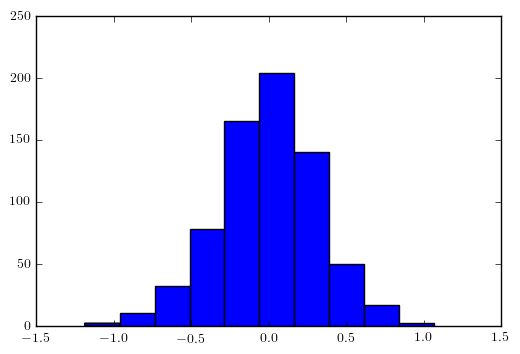

In [99]:
# plt.figure(figsize=(10,2))
for i in range(1):
    plt.figure()
    plt.hist(kf_fn.innovation[i, 100:])
# plt.plot(kf_fn.Ks.reshape(4, 800).T)

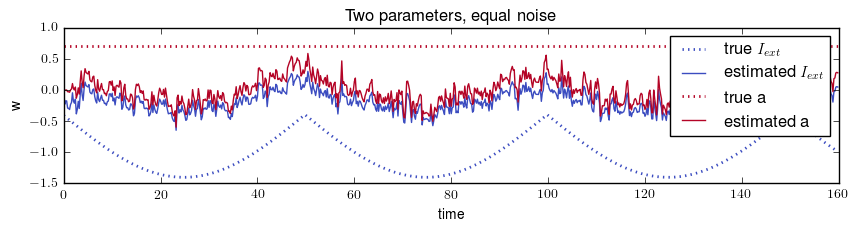

In [431]:
kf_fn = ukf.unscented_kalman_filter(fn, parameter_sigma=[25e-3, 25e-3])
kf_fn.unscented_kalman()

time = fn.time

plt.figure(figsize=(10,2))
cmap = {}
k = 2
cmap[0] = plt.get_cmap('coolwarm', k)
# cmap[1] = plt.get_cmap('Reds', k)
for i in range(2):
    plt.plot(time, fn.augmented_state[i, :], ':', lw=2, color=cmap[0](2*i), label='true ' + fn.parameter_names[i])
    plt.plot(time, kf_fn.estimated_state[i,:], color=cmap[0](2*i), label='estimated ' + fn.parameter_names[i])
plt.legend()
plt.xlabel('time')
plt.ylabel('w')
plt.title('Two parameters, equal noise')
plt.show()

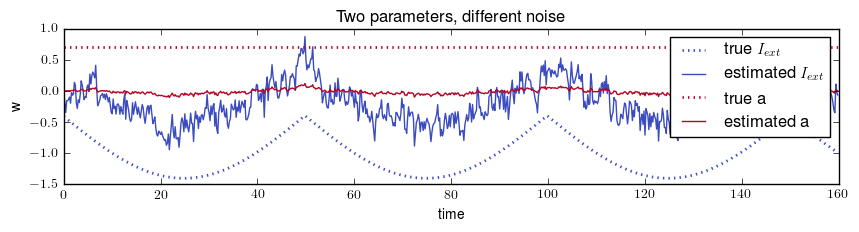

In [449]:
kf_fn = ukf.unscented_kalman_filter(fn, parameter_sigma=[25e-3, 25e-4])
kf_fn.unscented_kalman()

time = fn.time

plt.figure(figsize=(10,2))
cmap = {}
k = 2
cmap[0] = plt.get_cmap('coolwarm', k)
# cmap[1] = plt.get_cmap('Reds', k)
for i in range(2):
    plt.plot(time, fn.augmented_state[i, :], ':', lw=2, color=cmap[0](2*i), label='true ' + fn.parameter_names[i])
    plt.plot(time, kf_fn.estimated_state[i,:], color=cmap[0](2*i), label='estimated ' + fn.parameter_names[i])
plt.legend()
plt.xlabel('time')
plt.ylabel('w')
plt.title('Two parameters, different noise')
plt.show()

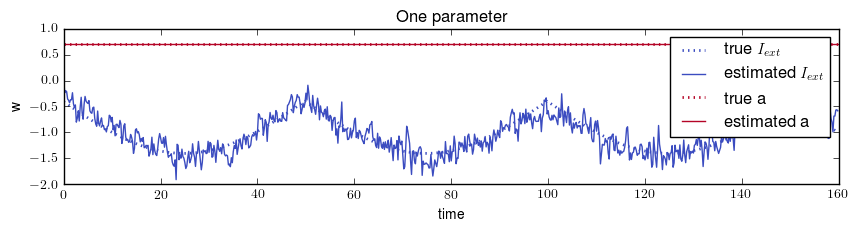

In [434]:
kf_fn = ukf.unscented_kalman_filter(fn, parameter_sigma=[25e-3, 0])
kf_fn.unscented_kalman()

time = fn.time

plt.figure(figsize=(10,2))
cmap = {}
k = 2
cmap[0] = plt.get_cmap('coolwarm', k)
# cmap[1] = plt.get_cmap('Reds', k)
for i in range(2):
    plt.plot(time, fn.augmented_state[i, :], ':', lw=2, color=cmap[0](2*i), label='true ' + fn.parameter_names[i])
    plt.plot(time, kf_fn.estimated_state[i,:], color=cmap[0](2*i), label='estimated ' + fn.parameter_names[i])
plt.legend()
plt.xlabel('time')
plt.ylabel('w')
plt.title('One parameter')
plt.show()

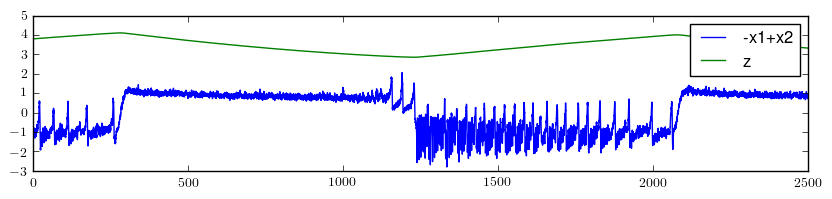

In [149]:
target = epileptor_util.epileptor_model()
target.generate_simulation(plot=False)
plt.figure(figsize=(10,2))
time = np.arange(0, target.total_time, target.dt_sample)
plt.plot(time, target.noisy_data[0], label='-x1+x2')
plt.plot(time, target.augmented_state[5,:], label='z')
plt.legend()
plt.show()

In [150]:
len(target) / 25

129250

In [141]:
evaluator = epileptor_evaluator.Epileptor_Evaluator(filename=filename)

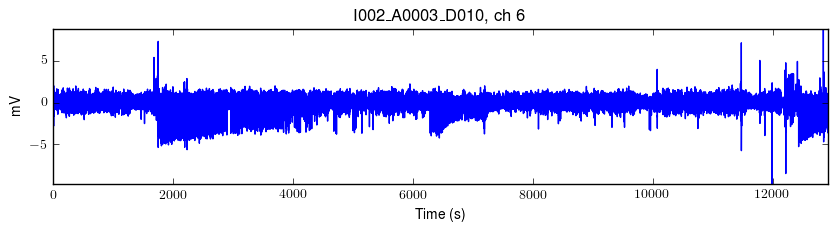

In [147]:
target, freq = epileptor_util.read_file(filename)
time = np.arange(0, len(target)/freq, 1/freq)
plt.figure(figsize=(10,2))
plt.plot(time, target)
plt.axis('tight')
plt.xlabel('Time (s)')
plt.ylabel('mV')
plt.title('I002\_A0003\_D010, ch 6')
plt.show()

Create the epileptor model object using the optimized parameters and set the noisy_data attribute of the object to the target data.

In [87]:
np.random.randint(1,100)

74

## State variables for target trace

In [155]:
with open(filename, 'rb') as f: 
        target = pickle.load(f)

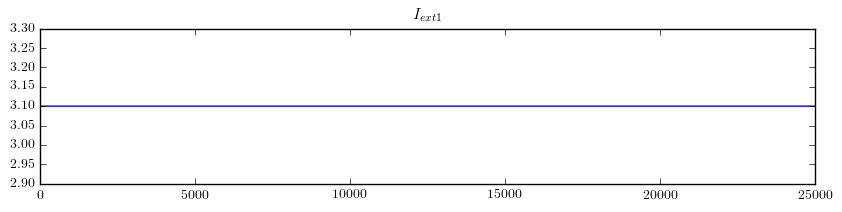

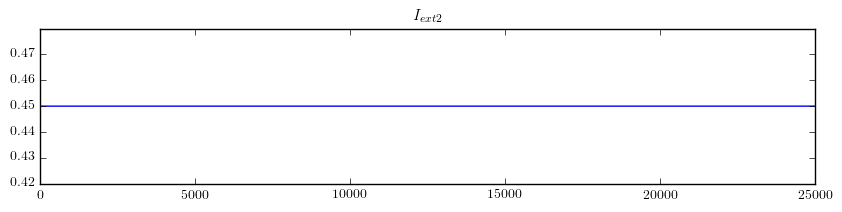

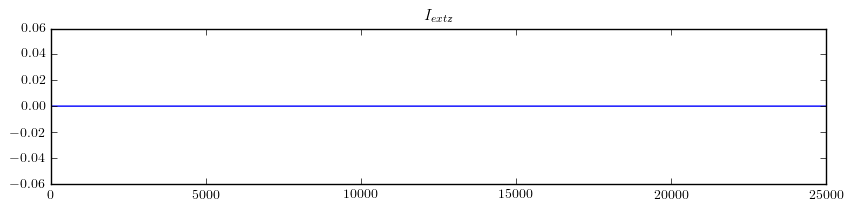

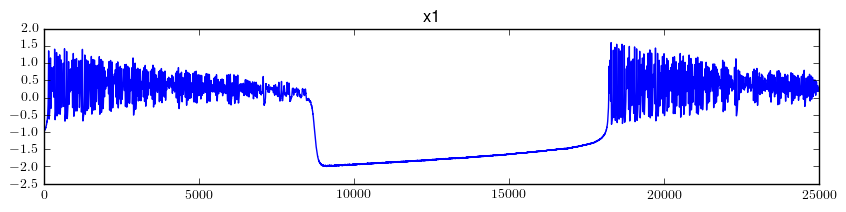

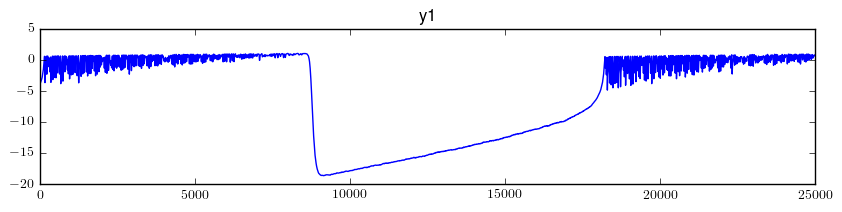

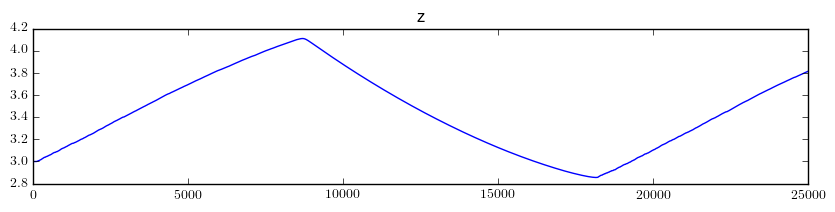

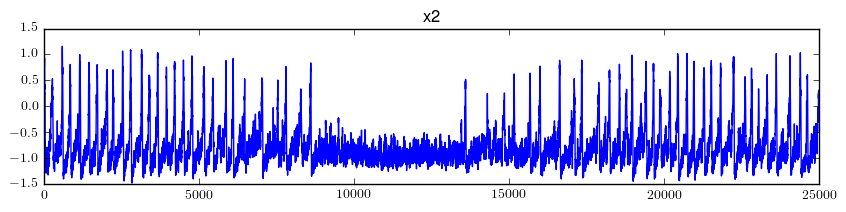

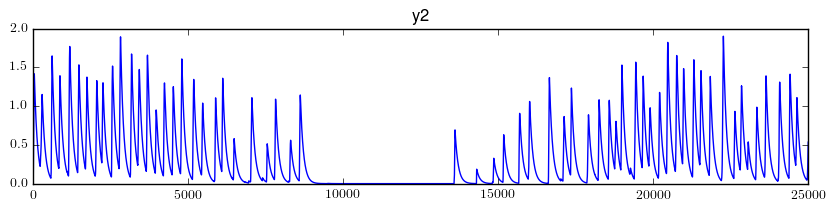

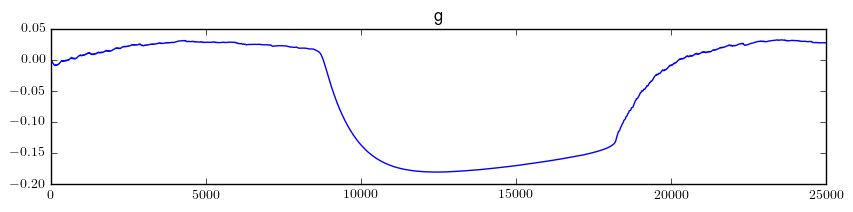

In [156]:
title_strings = np.hstack((target.parameter_names, target.var_names))
for i in range(target.dims_augmented_state):
    plt.figure(figsize=(10,2))
    plt.plot(target.augmented_state[i,:])
    plt.title(title_strings[i])
    plt.show()

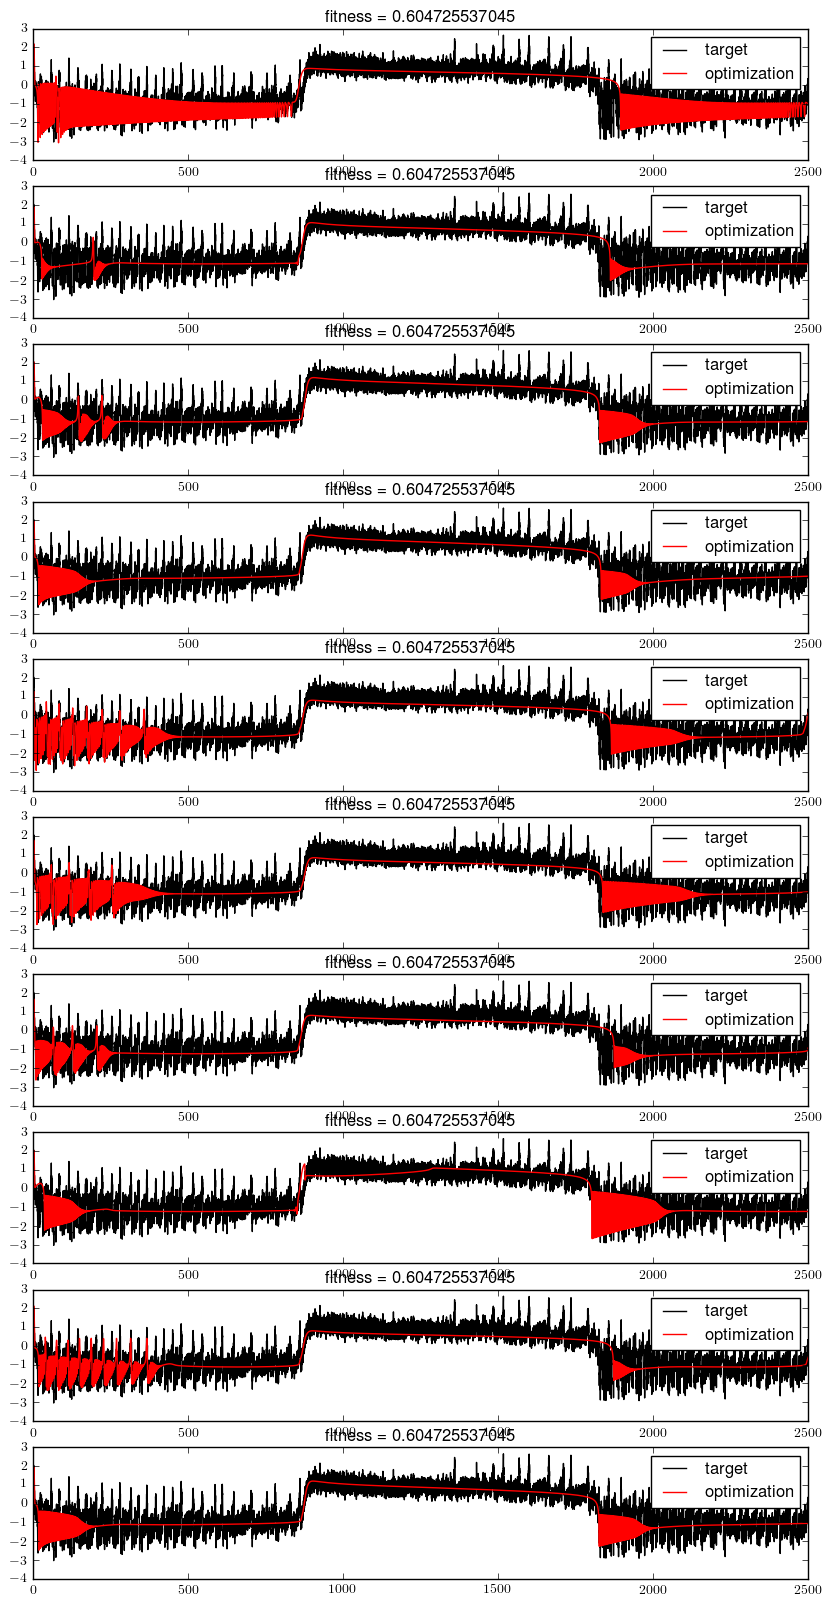

In [179]:
f = plt.figure(figsize=(10, 20))
sim = {}
ax = []

time = np.arange(0, target.total_time, target.dt_sample)
for i in range(10):
    sim[i] = epileptor_util.epileptor_model(params=params[i])
    sim[i].generate_simulation(plot=False)
    fitness = hall_of_fame[n][0].fitness.values[0]
#     plt.figure(figsize=(10,2))
    ax.append(f.add_subplot(10, 1, i + 1))
    ax[i].plot(time, target.noisy_data[0], 'k', label='target')
    ax[i].plot(time, sim[i].noisy_data[0], 'r', label='optimization')
    ax[i].set_title('fitness = ' + str(fitness))
    ax[i].legend()
f.show()

In [178]:
kf = {}
for i in range(10):
    kf[i] = ukf.unscented_kalman_filter(sim[i], observation_sigma=1.,
                                        parameter_sigma=[25e-2, 25e-2, 0])
    sim[i].noisy_data = target.noisy_data
    kf[i].unscented_kalman()
    

(array([  4.80000000e+01,   7.05000000e+02,   4.94800000e+03,
          1.29450000e+04,   6.27200000e+03,   5.10000000e+01,
          1.00000000e+01,   8.00000000e+00,   8.00000000e+00,
          5.00000000e+00]),
 array([-2.148325  , -1.45823381, -0.76814262, -0.07805143,  0.61203976,
         1.30213095,  1.99222213,  2.68231332,  3.37240451,  4.0624957 ,
         4.75258689]),
 <a list of 10 Patch objects>)

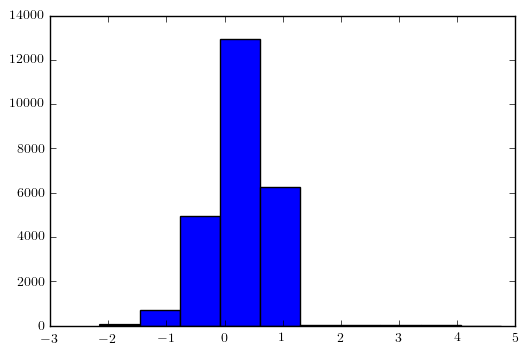

In [201]:
kf_bad = {}
for i in range(1):
    kf_bad[i] = ukf.unscented_kalman_filter(sim[i], observation_sigma=1.,
                                        parameter_sigma=[25e-2, 25e-2, 0])
    em_bad = epileptor_util.epileptor_model(tau0=2000, Irest1=1.3)
    em_bad.noisy_data = target.noisy_data
    kf_bad[i].unscented_kalman()

plt.hist(kf_bad[i].innovation[0])


In [ ]:
kf_bad[0].Ks.shape

In [ ]:
print(np.mean(kf_bad[0].innovation[0]))
print(np.std(kf_bad[0].innovation[0]))
plt.hist(np.squeeze(kf_bad[0].Ks)[0,:])

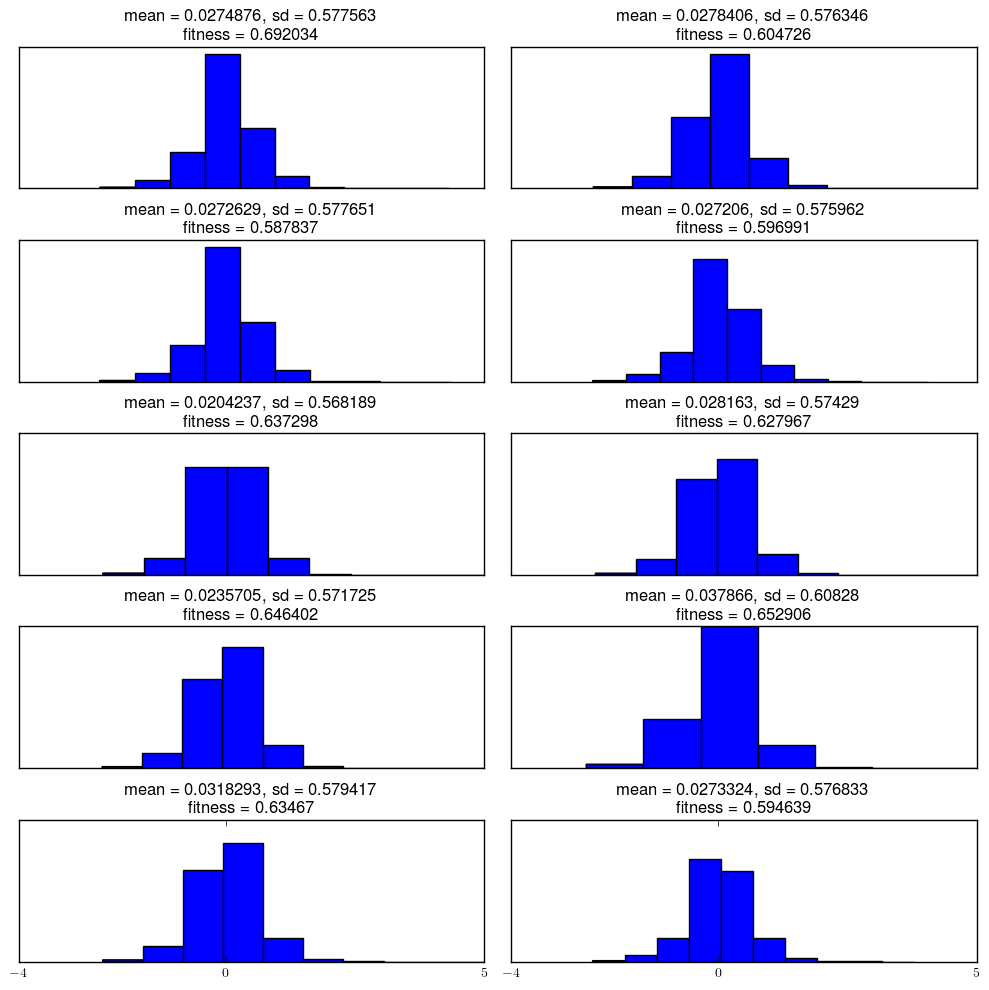

In [195]:
f_hist = plt.figure(figsize=(10, 10))
ax = []
for i in range(10):
    ax.append(f_hist.add_subplot(5,2,i+1))
    ax[i].hist(kf[i].innovation[0])
    ax[i].set_title('mean = {:4g}, sd = {:4g}\nfitness = {:4g}'.
                    format(np.mean(kf[i].innovation[0]), np.std(kf[i].innovation[0]),
                           hall_of_fame[i][0].fitness.values[0]))
    ax[i].set_xlim(-4, 5)
    ax[i].set_ylim(0, 14000)
    ax[i].set_yticks([])
    ax[i].set_xticks([])
#     plt.hist(kf[i].innovation[0])
ax[8].set_xticks([-4, 0, 5])
ax[9].set_xticks([-4, 0, 5])
plt.tight_layout()
plt.show()

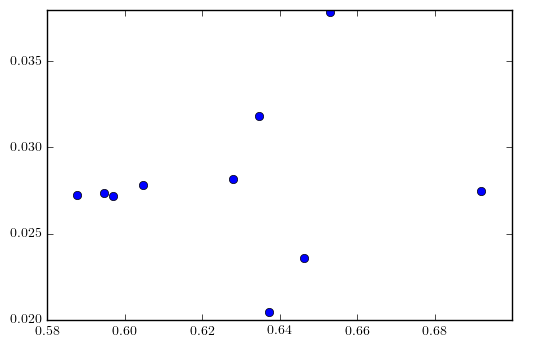

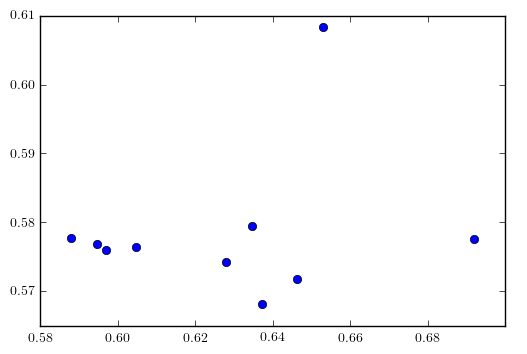

In [200]:
fitness = [hall_of_fame[i][0].fitness.values[0] for i in range(10)]
mn = [np.mean(kf[i].innovation[0]) for i in range(10)]
sd = [np.std(kf[i].innovation[0]) for i in range(10)]
plt.plot(fitness, mn, 'o')
plt.figure()
plt.plot(fitness, sd, 'o')

In [222]:
target_sub, dt_sample, num_samples = epileptor_util.subsample_data(target, dt_sample=0.1,
                                                             sample_freq=freq)
target_sub.shape

(129250,)

In [227]:
reload_packages()

In [237]:
initial_estimate = kf_eeg.estimated_state[:,0]
initial_estimate[0:2] = kf_eeg.estimated_state[0:2,-1]
initial_estimate[2] = 1.
initial_estimate

array([ 26.86552517,   5.60843754,   1.        ,  -0.05993481,
         0.        ,   0.        ,  -0.11986963,   0.        ,   0.        ])

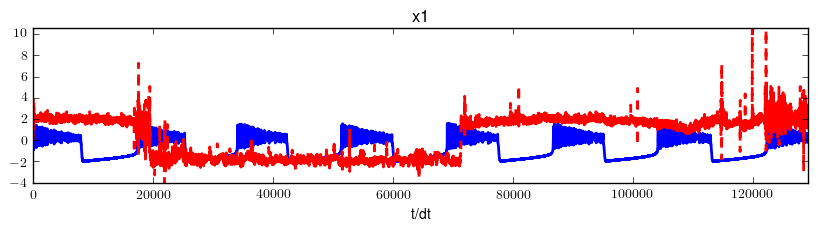

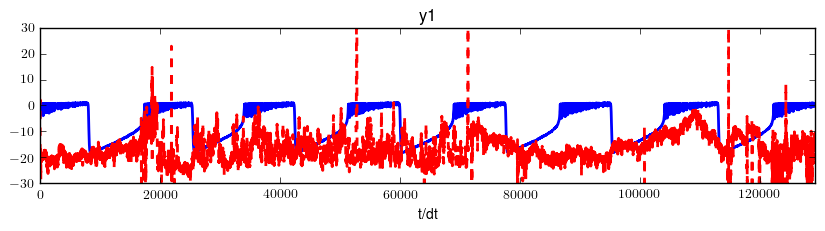

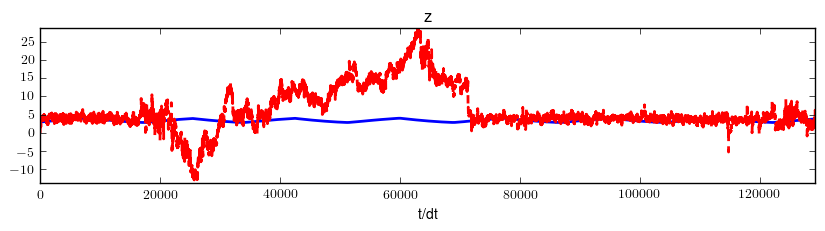

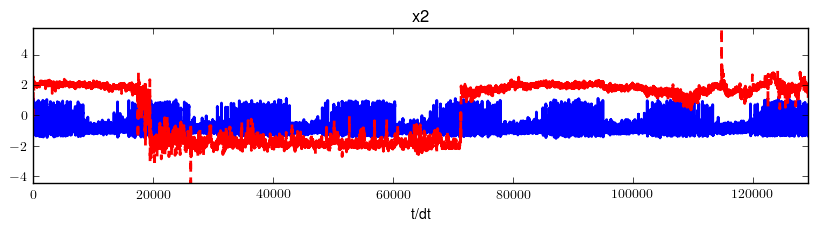

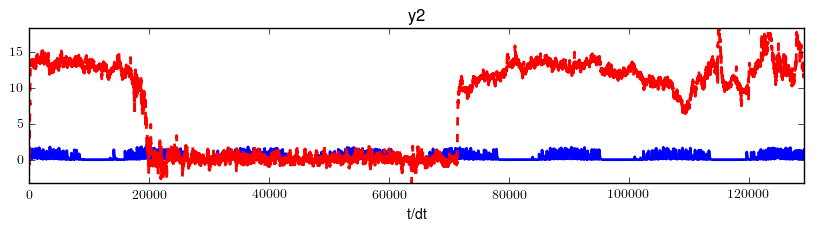

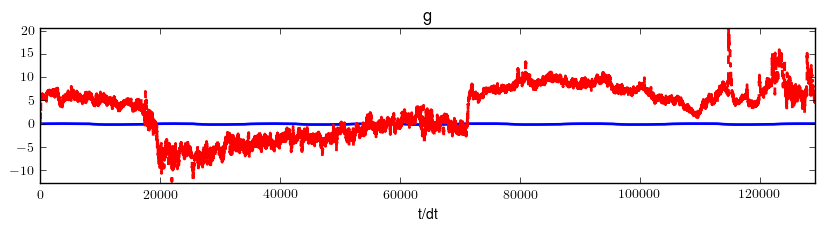

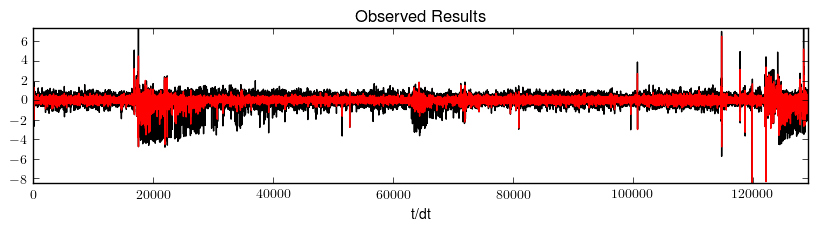

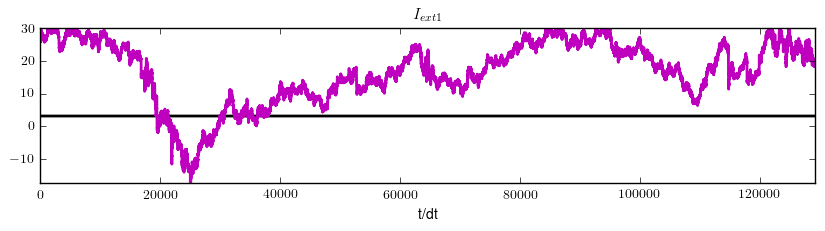

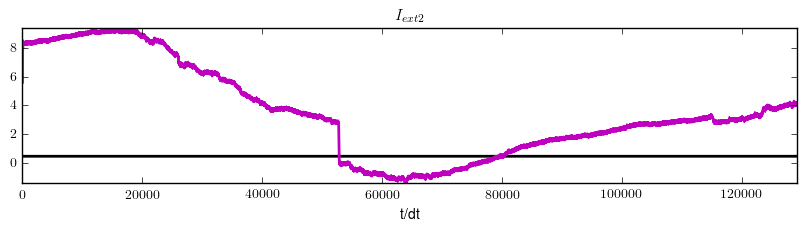

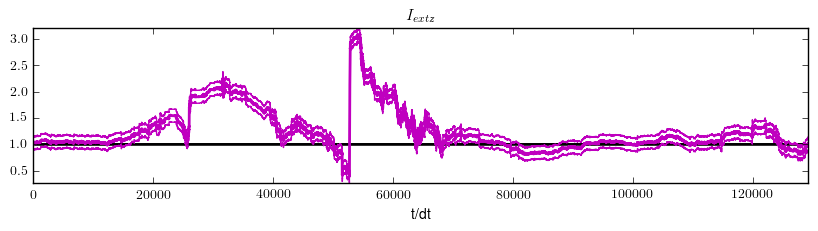

In [238]:
# evaluator.generate_simulation()
# target_sub, dt_sample, num_samples = epileptor_util.subsample_data(target, dt_sample=0.1,
#                                                              sample_freq=freq)
# total_time = num_samples * dt_sample
# sim_eeg = epileptor_util.epileptor_model(total_time=total_time, dt_sample=dt_sample)
# sim_eeg.generate_simulation(plot=True)
# sim_eeg.noisy_data = target_sub.reshape(1, -1)
# kf_eeg = ukf.unscented_kalman_filter(sim_eeg, state_sigma=25e-4)
# kf_eeg.unscented_kalman(initial_estimate='model')
initial_estimate = kf_eeg.estimated_state[:,0]
initial_estimate[0:2] = kf_eeg.estimated_state[0:2,-1]
initial_estimate[2] = 1.
kf_eeg.unscented_kalman(initial_estimate=initial_estimate)
kf_eeg.plot_filter_results(separated=True)


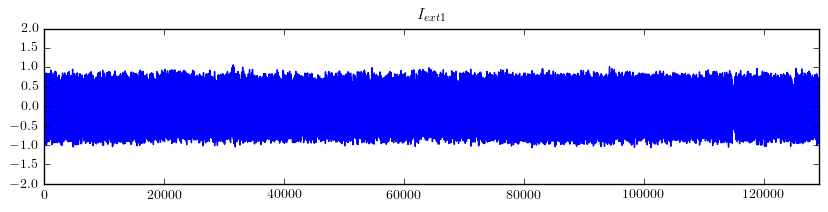

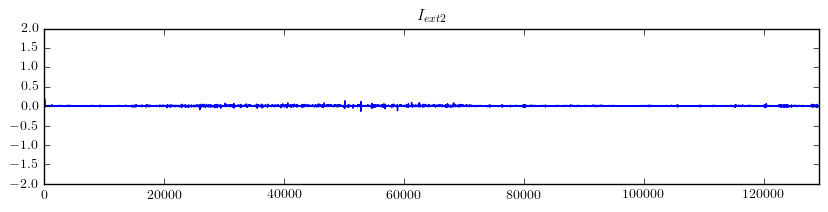

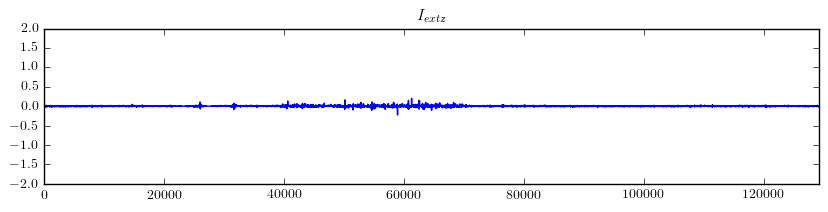

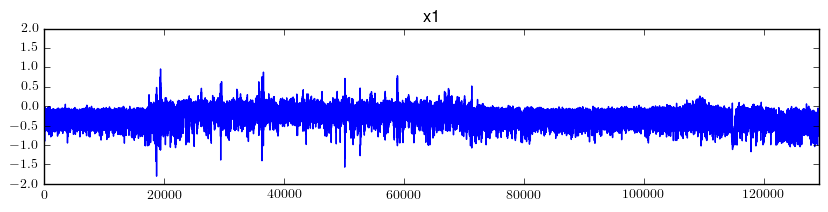

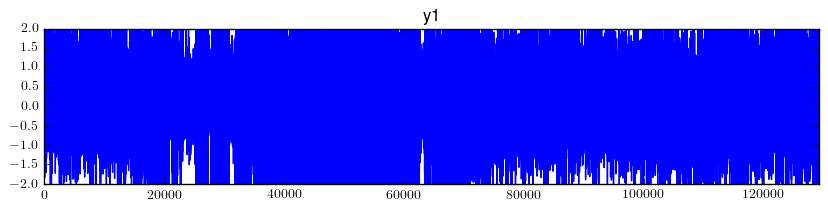

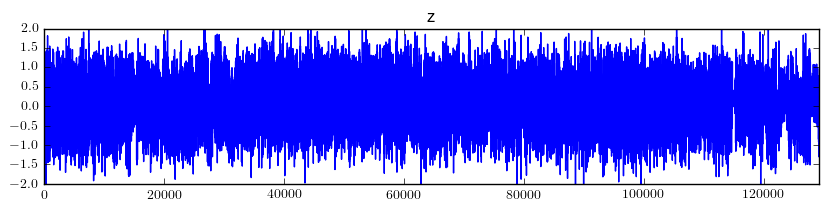

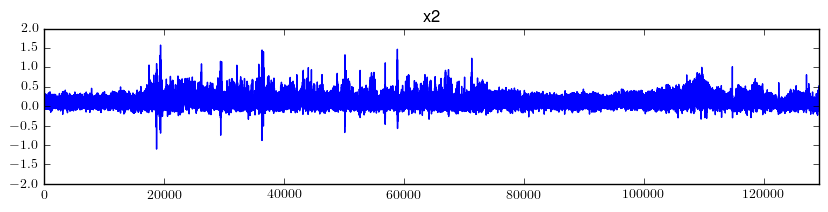

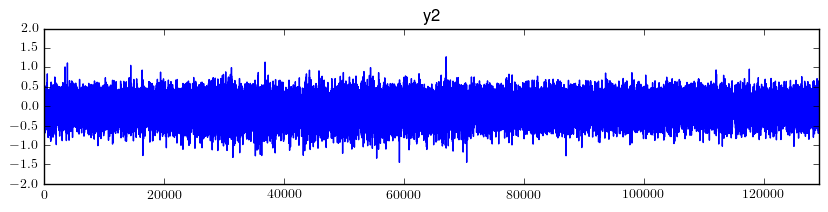

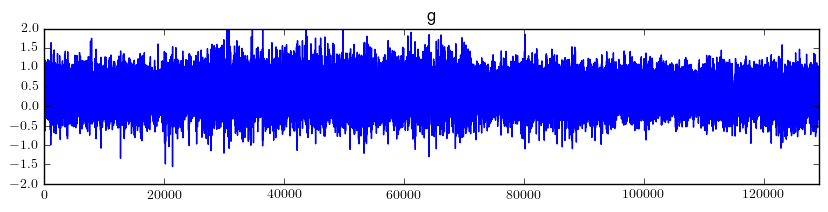

In [248]:
i = 0
for k in kf_eeg.Ks.reshape(9,-1):
    plt.figure(figsize=(10,2))
    plt.plot(k)
    plt.axis('tight')
    plt.ylim((-2., 2.))
    plt.title(title_strings[i])
    i += 1
    plt.show()

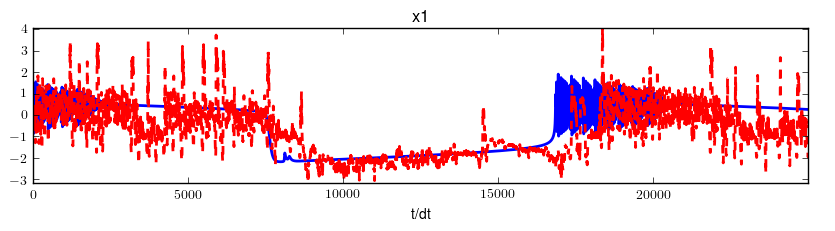

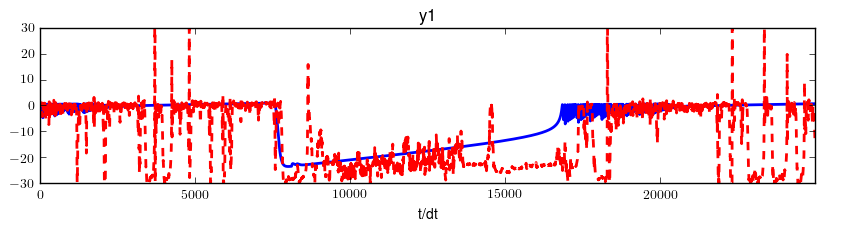

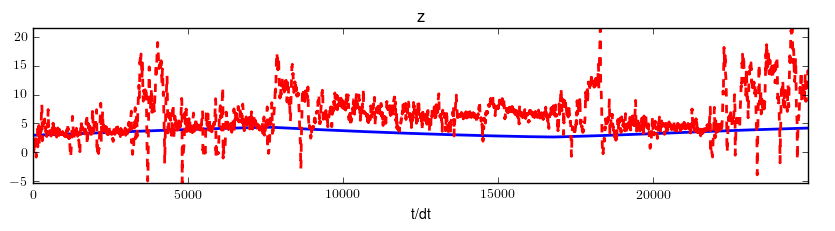

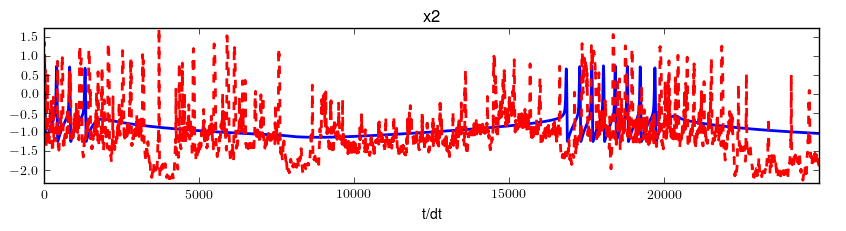

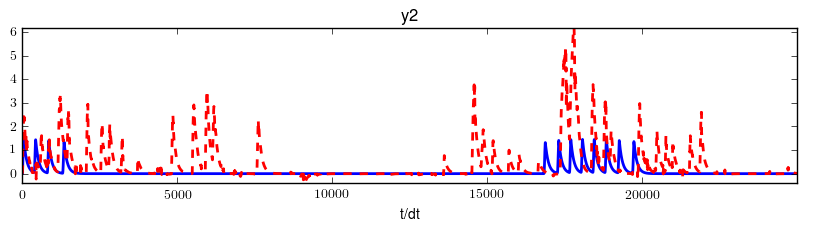

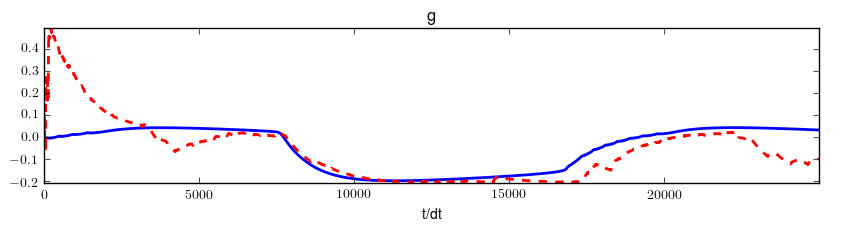

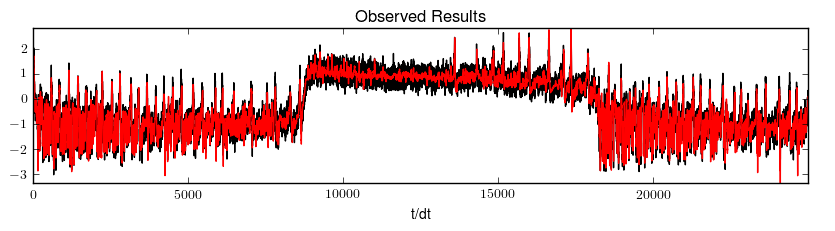

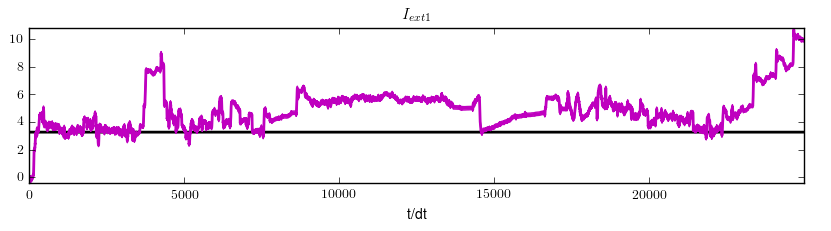

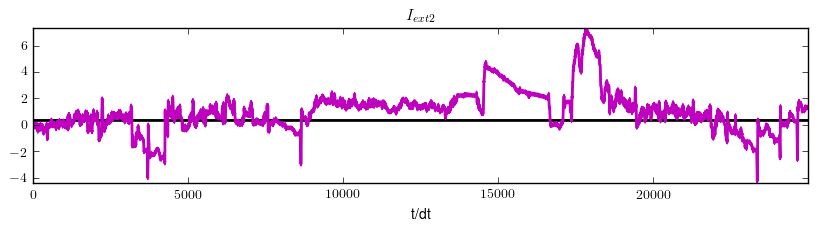

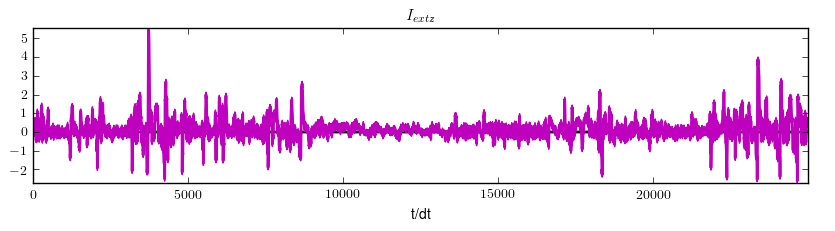

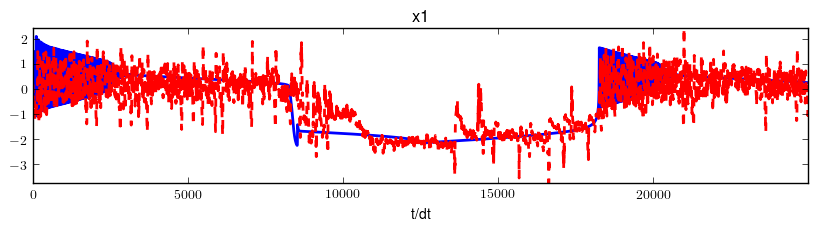

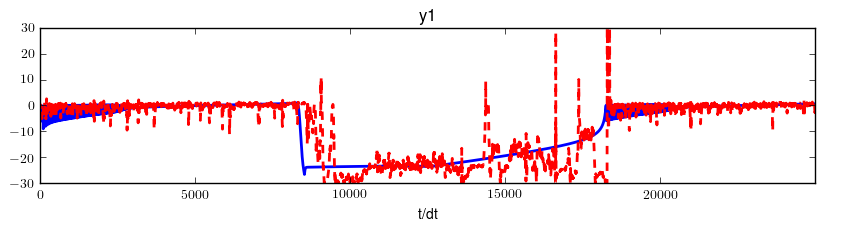

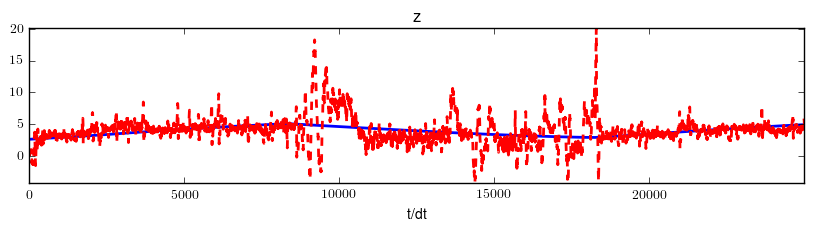

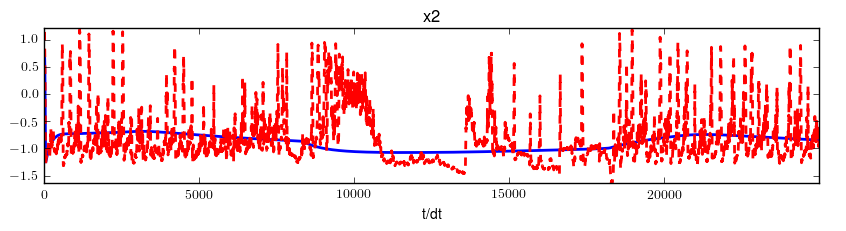

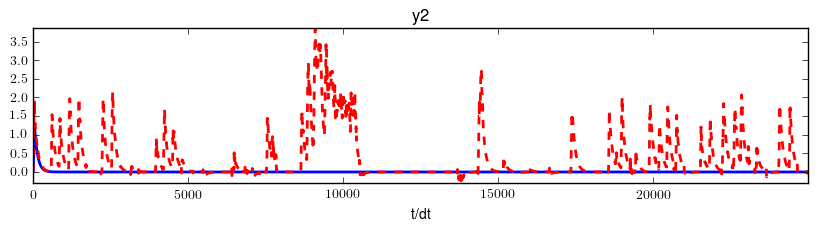

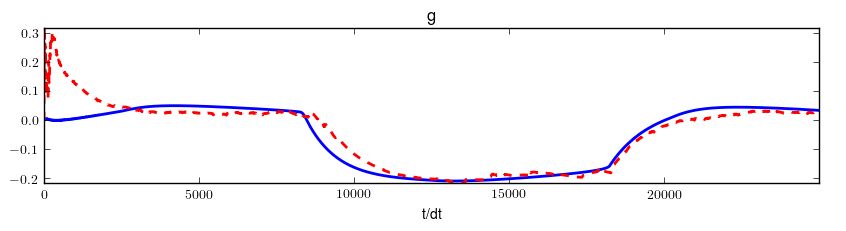

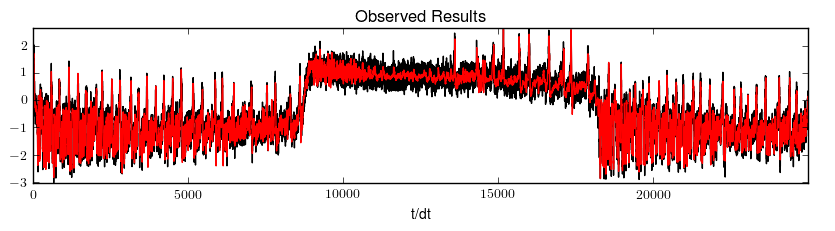

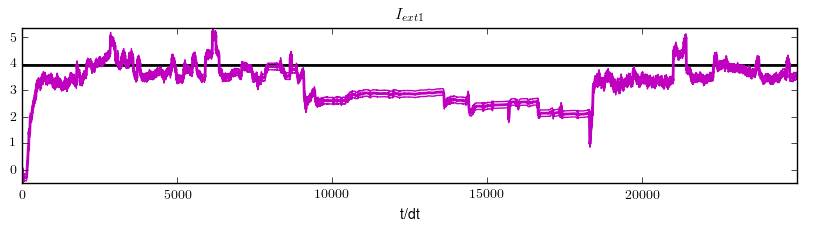

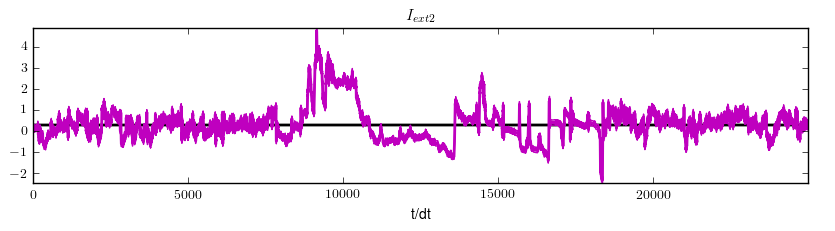

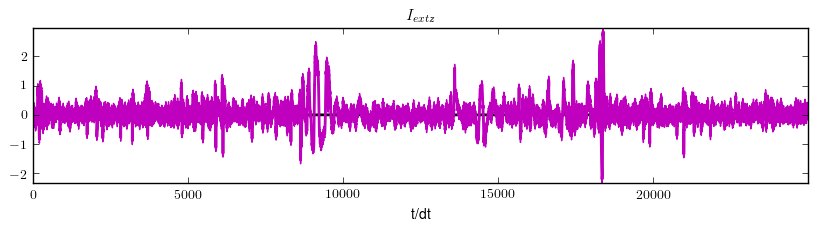

In [187]:
# reload_packages()
kf = {}
for i in range(2):
#     sim[i].noisy_data = target.noisy_data
    kf[i] = ukf.unscented_kalman_filter(sim[i])
    kf[i].unscented_kalman(initial_estimate='model')
    kf[i].plot_filter_results(separated=True)

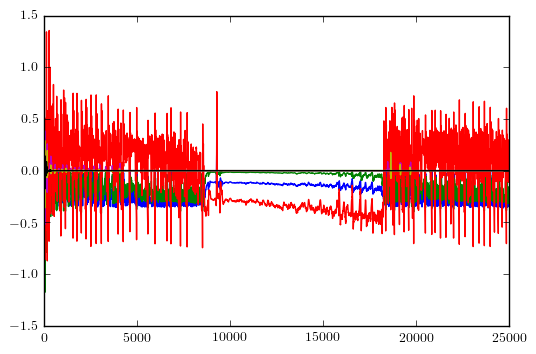

In [107]:
plt.plot(kf.Ks.reshape(7, 25000).T)
plt.show()

## After changing I_ext to reflect current injected into the second ensemble

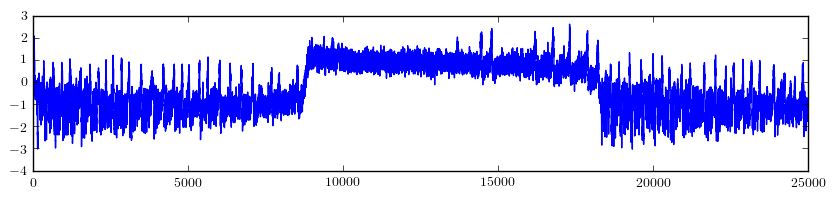

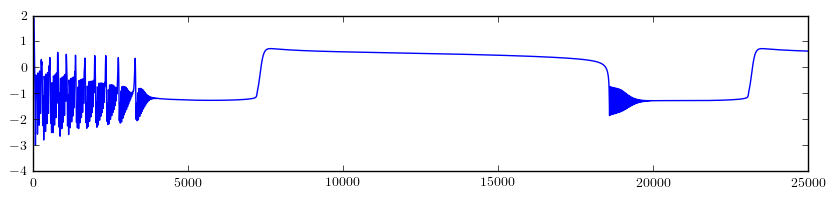

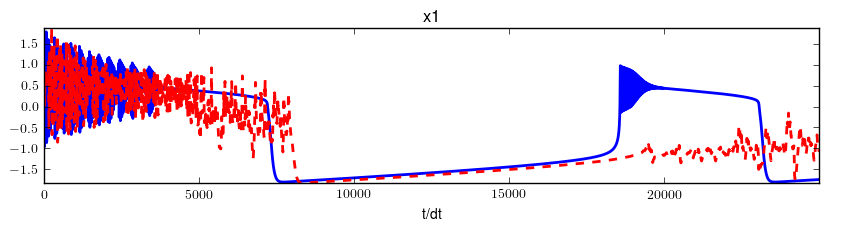

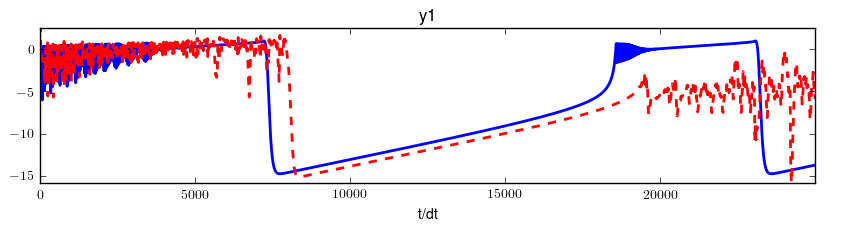

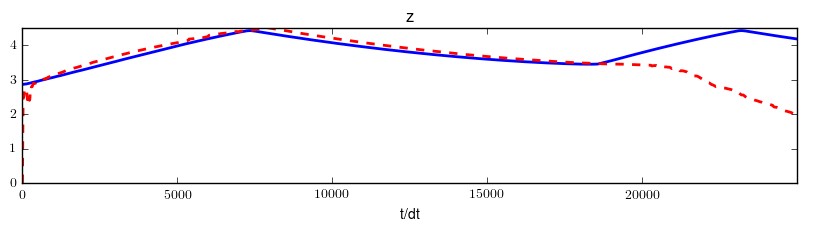

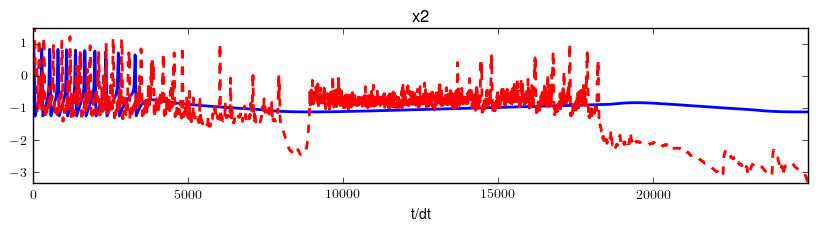

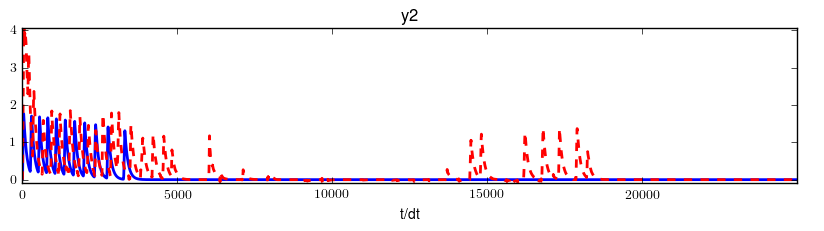

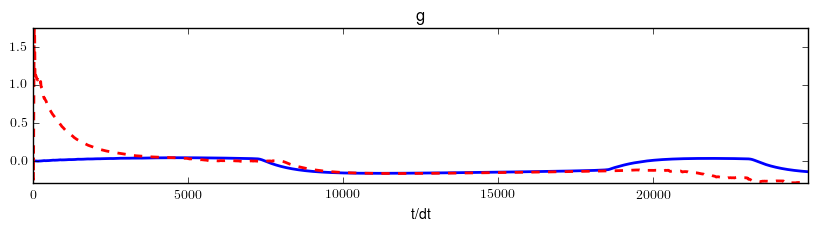

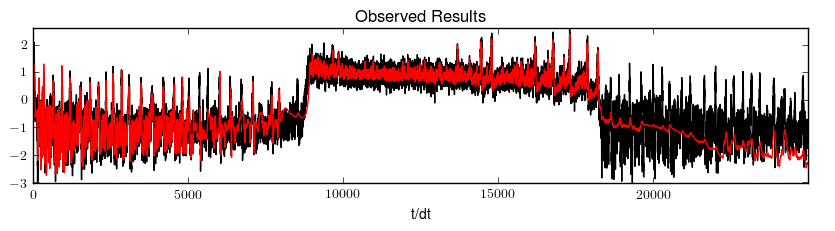

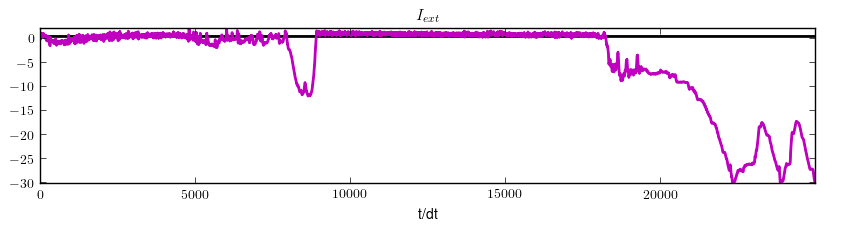

In [108]:
reload_packages()
target = epileptor_util.epileptor_model()
target.generate_simulation(plot=False)
plot_sim_trace(target)
sim = epileptor_util.epileptor_model(params=params0)
sim.generate_simulation(plot=False)
plot_sim_trace(sim)
sim.noisy_data = target.noisy_data
kf = ukf.unscented_kalman_filter(sim)
kf.unscented_kalman(initial_estimate='model')
kf.plot_filter_results(separated=True)

## After adding I_ext parameters for both ensembles and the z variable
By changing the _parameter_sigma_ attribute we can focus on any subset of the parameters. For example

    parameter_sigma=[0, 15e-3, 0]

will run such that only the current injected into the second ensemble is allowed to vary. Note that in the program a sigma of zero is reset to 1e-16 so that the Cholesky decomposition can still be used to generate the sigma points.

Running with all three parameters makes a mess. The following, however, works reasonably well:
    
    parameter_sigma=[15e-3, 15e-4, 0]

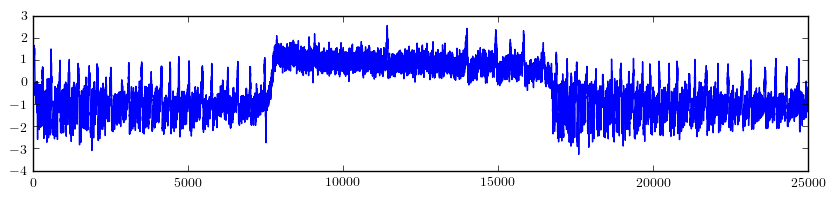

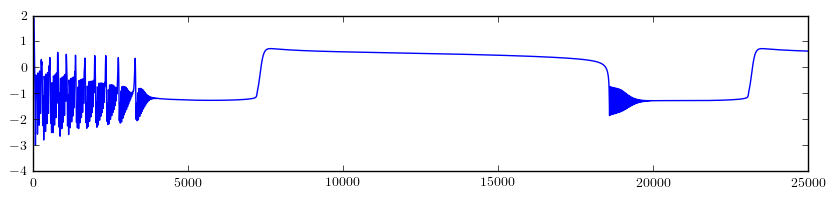

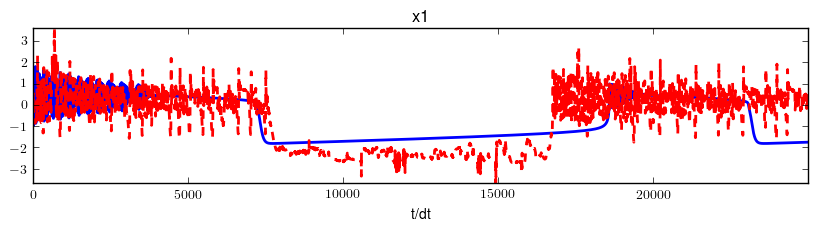

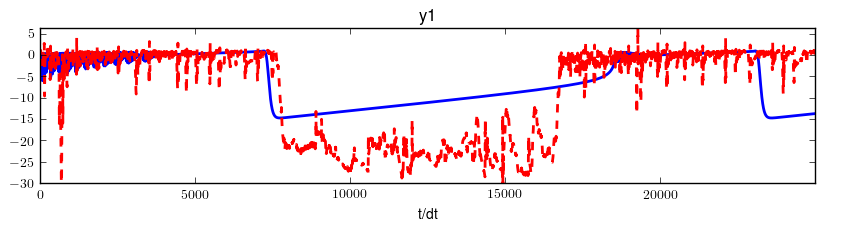

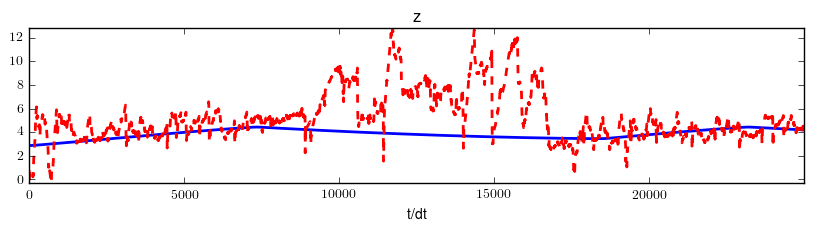

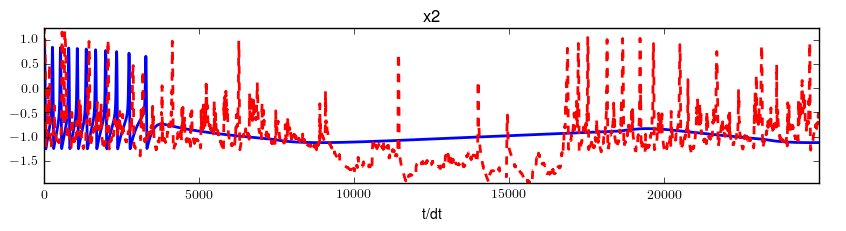

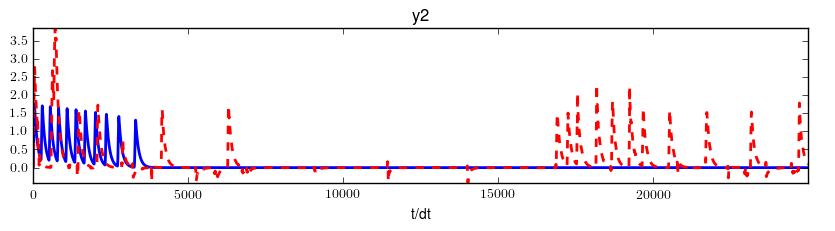

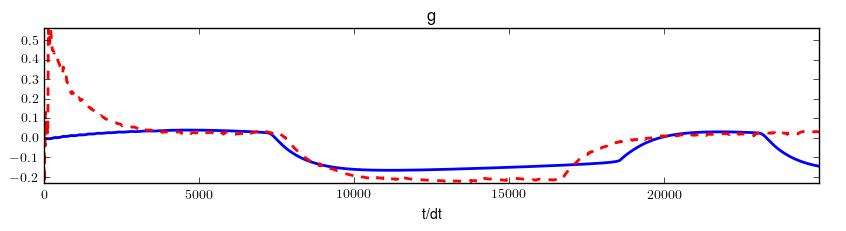

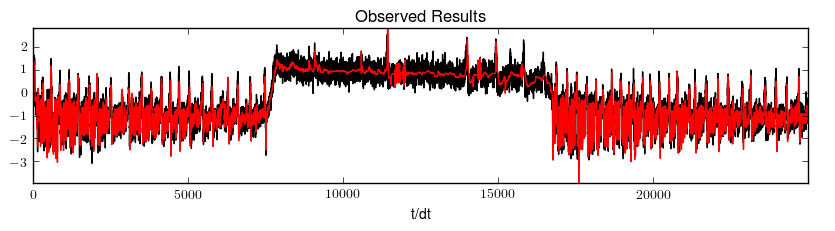

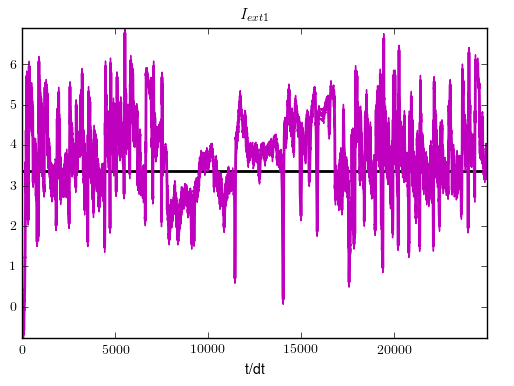

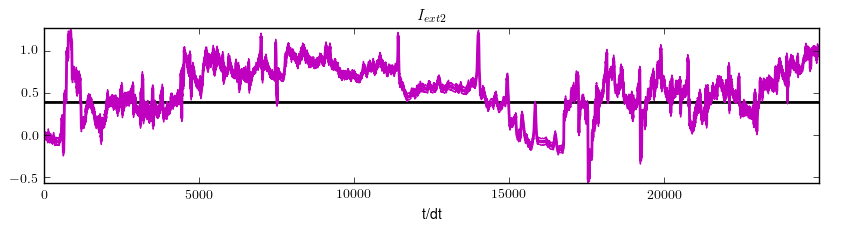

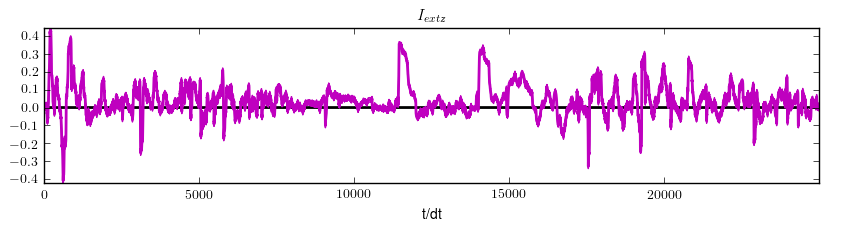

In [158]:
reload_packages()
target = epileptor_util.epileptor_model()
target.generate_simulation(plot=False)
plot_sim_trace(target)
sim = epileptor_util.epileptor_model(params=params0)
sim.generate_simulation(plot=False)
plot_sim_trace(sim)
sim.noisy_data = target.noisy_data
kf = ukf.unscented_kalman_filter(sim, parameter_sigma=[15e-3, 15e-4, 15e-5])
kf.unscented_kalman(initial_estimate='model')
kf.plot_filter_results(separated=True)

## Second pass
In this case, setting the initial estimate of the parameters to the final state of the parameters from a previous run does not make a huge improvement. The parameters were initialized to zero in the first place, though, which is at most 3.1 away from the actual value (in the case of _Irest1_).

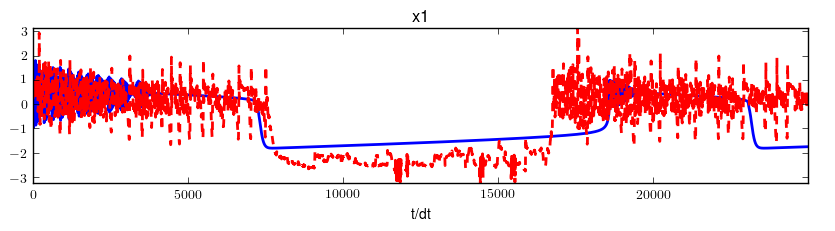

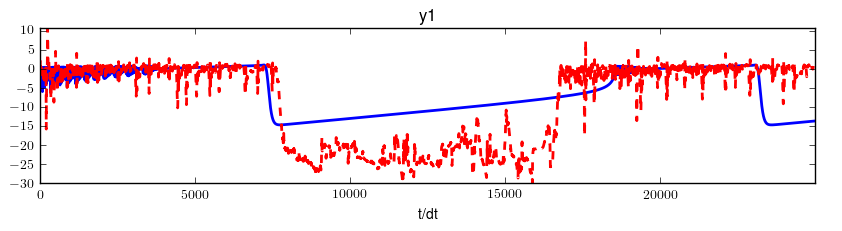

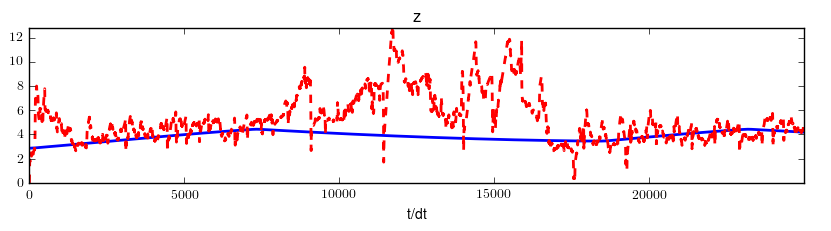

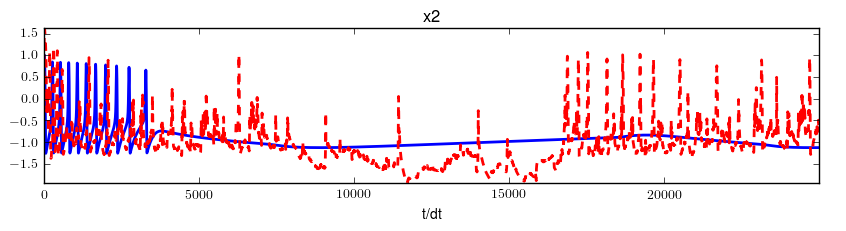

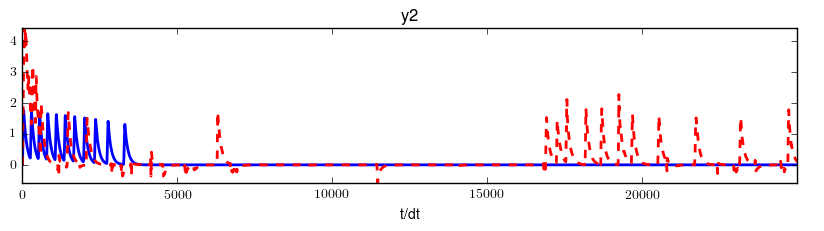

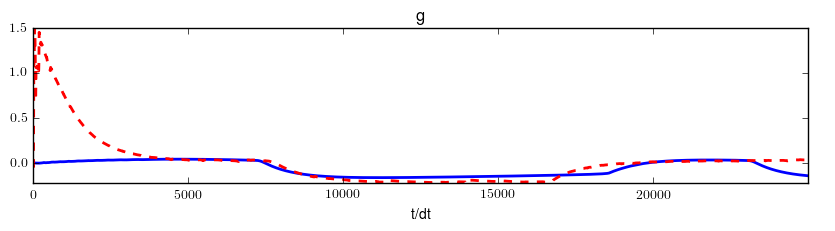

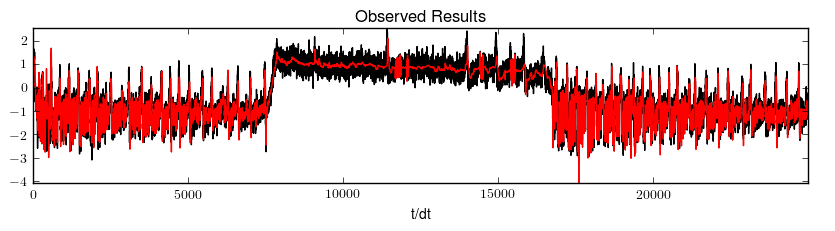

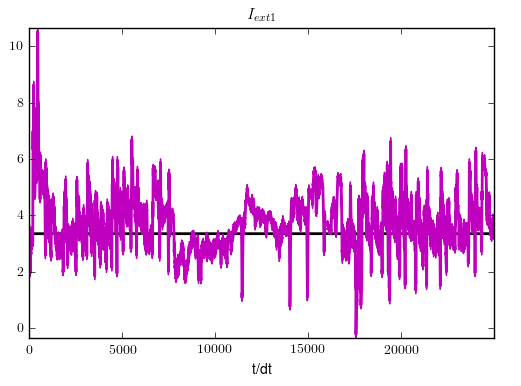

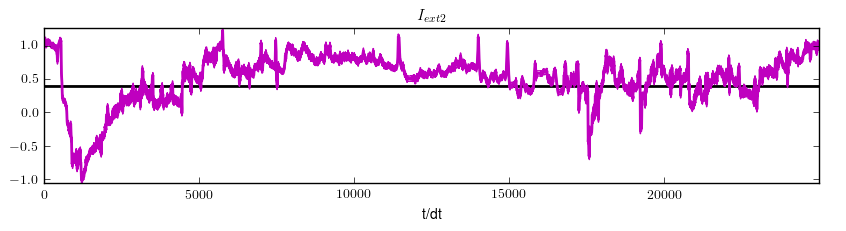

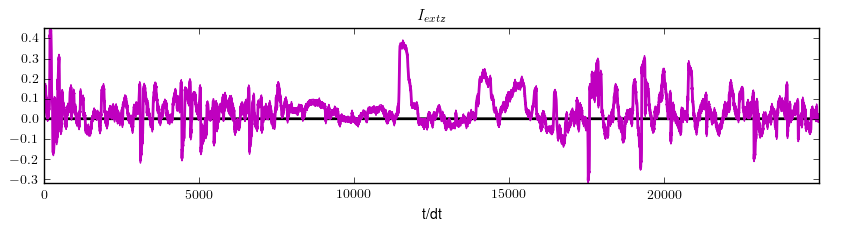

In [159]:
initial_estimate = kf.estimated_state[:, 0]
initial_estimate[:kf.model.dims_params] = kf.estimated_state[:kf.model.dims_params, -1]
kf.unscented_kalman(initial_estimate=initial_estimate)
kf.plot_filter_results(separated=True)